<a href="https://colab.research.google.com/github/DSQUEST100/PG_AI_public/blob/main/Agencja_nieruchomo%C5%9Bci.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wczytanie zestawu

In [ ]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv('/agencja_nieruchomosci.csv')

In [ ]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


# Analiza informacji o zestawie

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
for column in df.select_dtypes(include=['object']).columns:
    print(f"Unikalne wartości w kolumnie '{column}': {df[column].unique()}")


Unikalne wartości w kolumnie 'mainroad': ['yes' 'no']
Unikalne wartości w kolumnie 'guestroom': ['no' 'yes']
Unikalne wartości w kolumnie 'basement': ['no' 'yes']
Unikalne wartości w kolumnie 'hotwaterheating': ['no' 'yes']
Unikalne wartości w kolumnie 'airconditioning': ['yes' 'no']
Unikalne wartości w kolumnie 'prefarea': ['yes' 'no']
Unikalne wartości w kolumnie 'furnishingstatus': ['furnished' 'semi-furnished' 'unfurnished']


##Podsumowanie
- zestaw zawiera 6 kolumn w formacie int i 7 tekstowych
- brak wartości pustych
- ponieważ wszystkie kolumny object zawierają 2 lub 3 wartości przemapuje je na intigera bo wtedy łatwiej analizować. Dla Furnishing status przyjmę także mapowanie na cyfry (a nie format category) przyjmując logikę że im bardziej umeblowane mieszkanie tym wyższa jego wartość/price.
- cechy podzielić można 3 grupy:
    - struktura budynku: 'bedrooms', 'bathrooms', 'stories', 'guestroom', 'basement'
    - ułatwienia/uprzyjemniacze życia: 'mainroad', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus'
    - wskaźniki finansowe: 'price', 'area'


W analizie skupię najpierw na opisie statystycznym nieruchomości a potem na wpływie cech niefinansowych na finansowe.

In [ ]:
# Kolumny do przemapowania
columns_to_map = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Mapowanie wartości yes/no na True/False i zamiana na int64
for column in columns_to_map:
    df[column] = df[column].map({'yes': True, 'no': False}).astype(int)

# Mapowanie wartości furnishingstatus
df['furnishingstatus'] = df['furnishingstatus'].map({
    'semi-furnished': 1,
    'unfurnished': 0,
    'furnished': 2
})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


# Analiza statystyk nieruchomości

## Struktura budynków

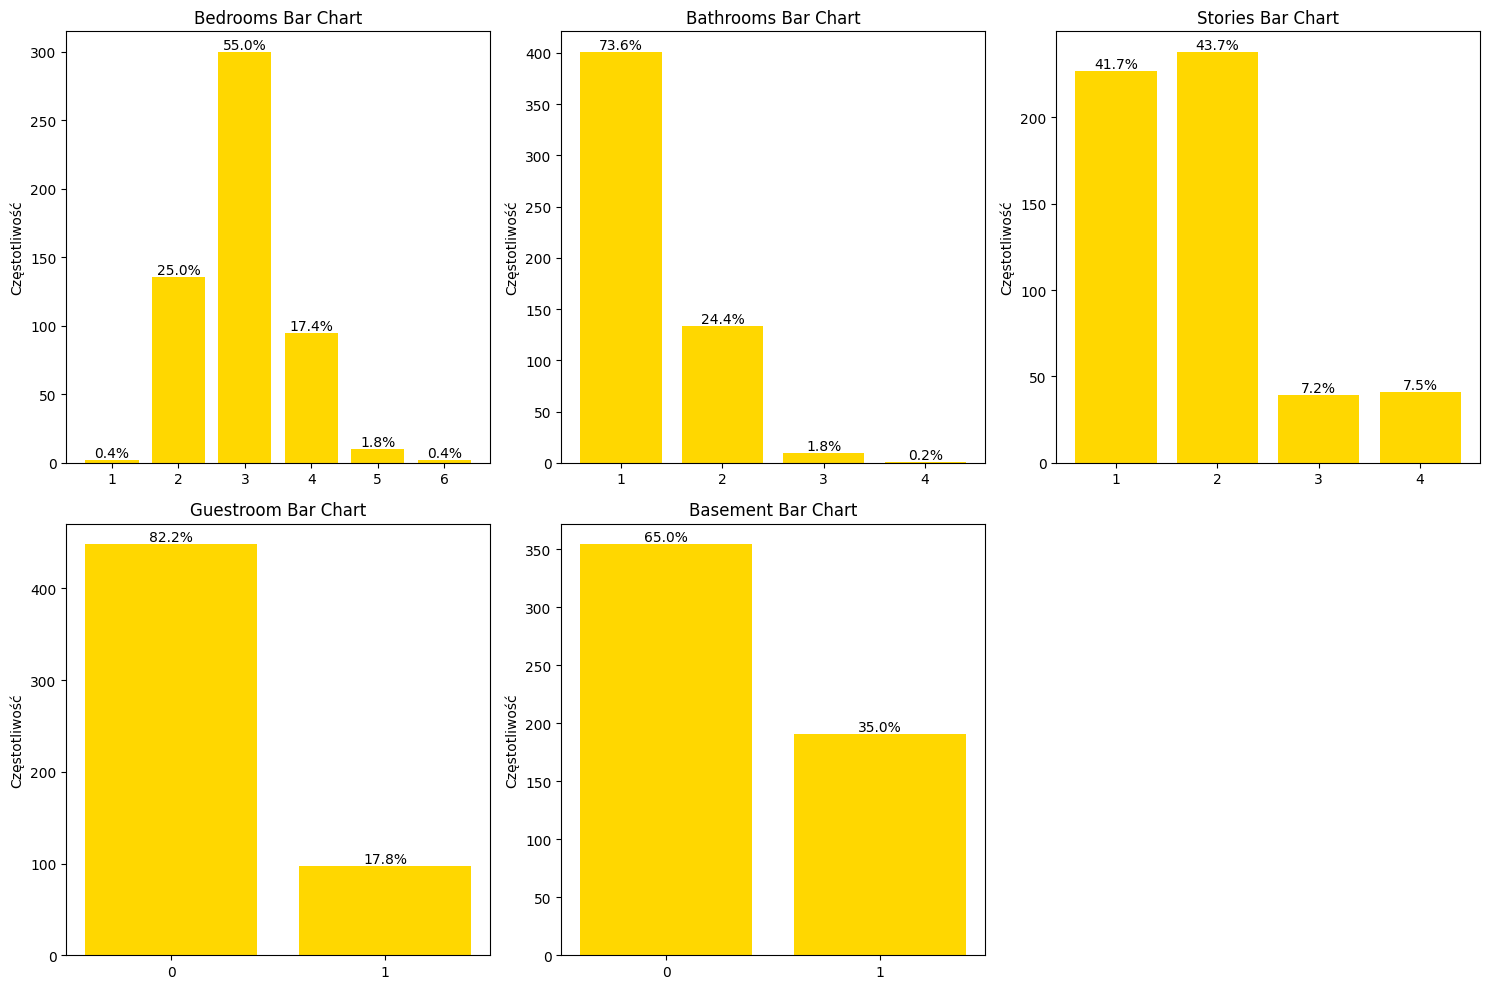

In [ ]:
# Rozkłady wartości w kolumnach strukturalnych

# Lista kolumn do wizualizacji
struktura = ['bedrooms', 'bathrooms', 'stories', 'guestroom', 'basement']

# Tworzenie wykresów słupkowych w układzie 2x3
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

# Ustawienie łagodnego żółtego koloru
bar_color = '#FFD700'  # Blady żółty

for i, cecha in enumerate(struktura):
    value_counts = df[cecha].value_counts().sort_index()  # Liczenie wystąpień każdej wartości

    # Tworzenie wykresu słupkowego
    axes[i].bar(value_counts.index, value_counts.values, color=bar_color)
    axes[i].set_title(f"{cecha.capitalize()} Bar Chart")
    axes[i].set_ylabel("Częstotliwość")  # Pozostawienie opisu osi Y

    # Usunięcie linii siatki z osi Y
    axes[i].grid(axis='y', visible=False)

    # Ustawienie osi X jako wartości z kolumny (bez podpisu osi)
    axes[i].set_xticks(value_counts.index)
    axes[i].set_xticklabels(value_counts.index)

    # Dodawanie wartości procentowych nad słupkami
    for x, y in zip(value_counts.index, value_counts.values):
        percentage = f"{(y / value_counts.sum() * 100):.1f}%"
        axes[i].text(x, y, percentage, ha='center', va='bottom', fontsize=10, color='black')

# Usunięcie pustej osi, jeśli liczba cech nie jest wielokrotnością liczby podwykresów
if len(struktura) < len(axes):
    for j in range(len(struktura), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## Ułatwienia/uprzyjemnienia

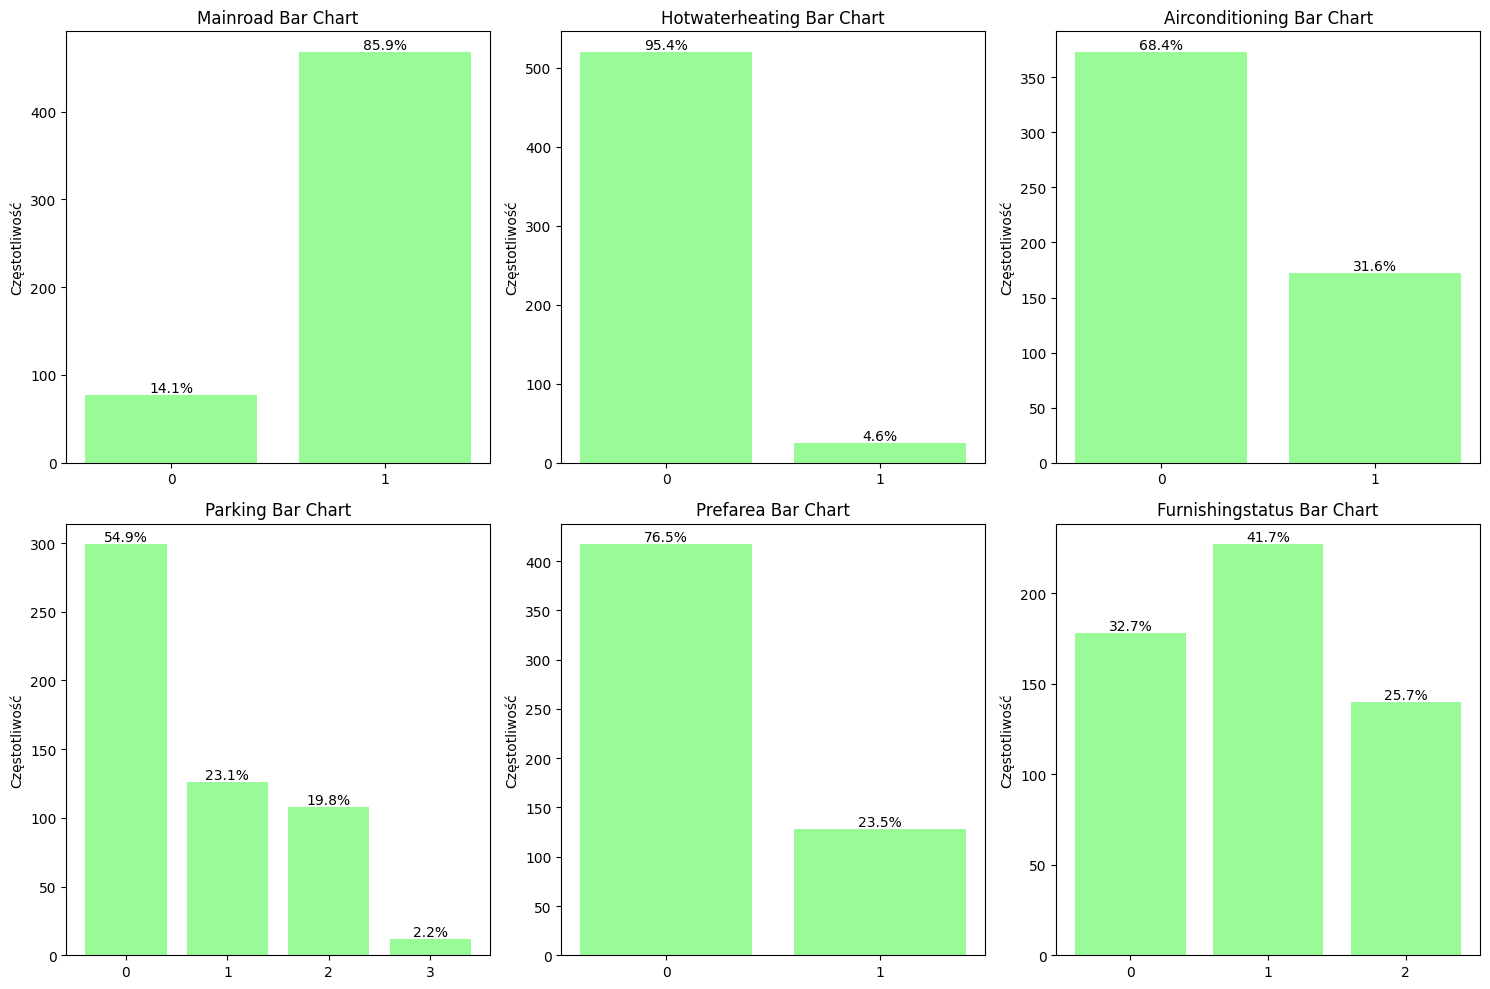

In [ ]:
#Rozkłady wartości w zmiennych ułatwień

# Lista kolumn do wizualizacji
facilities = ['mainroad', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']

# Tworzenie wykresów słupkowych w układzie 2x3
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

# Ustawienie łagodnego zielonego koloru
bar_color = '#98FB98'  # PaleGreen

for i, cecha in enumerate(facilities):
    value_counts = df[cecha].value_counts().sort_index()  # Liczenie wystąpień każdej wartości

    # Tworzenie wykresu słupkowego
    axes[i].bar(value_counts.index, value_counts.values, color=bar_color)
    axes[i].set_title(f"{cecha.capitalize()} Bar Chart")
    axes[i].set_ylabel("Częstotliwość")

    # Usunięcie linii siatki z osi Y
    axes[i].grid(axis='y', visible=False)

    # Ustawienie osi X jako wartości z kolumny (bez podpisu osi)
    axes[i].set_xticks(value_counts.index)
    axes[i].set_xticklabels(value_counts.index)

    # Dodawanie wartości procentowych nad słupkami
    for x, y in zip(value_counts.index, value_counts.values):
        percentage = f"{(y / value_counts.sum() * 100):.1f}%"
        axes[i].text(x, y, percentage, ha='center', va='bottom', fontsize=10, color='black')

# Usunięcie pustej osi, jeśli liczba cech nie jest wielokrotnością liczby podwykresów
if len(facilities) < len(axes):
    for j in range(len(facilities), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## Cechy finansowe

In [ ]:
# Dodanie kolumny avg_price bo to w sumie ciekawsza i bardziej wartościowa informacja niż cena czy area
df['avg_price'] = (df['price'] / df['area']).round().astype(int)

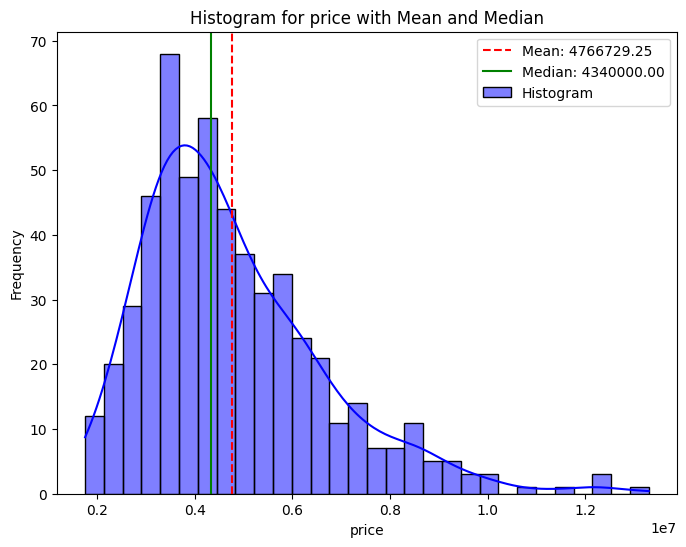

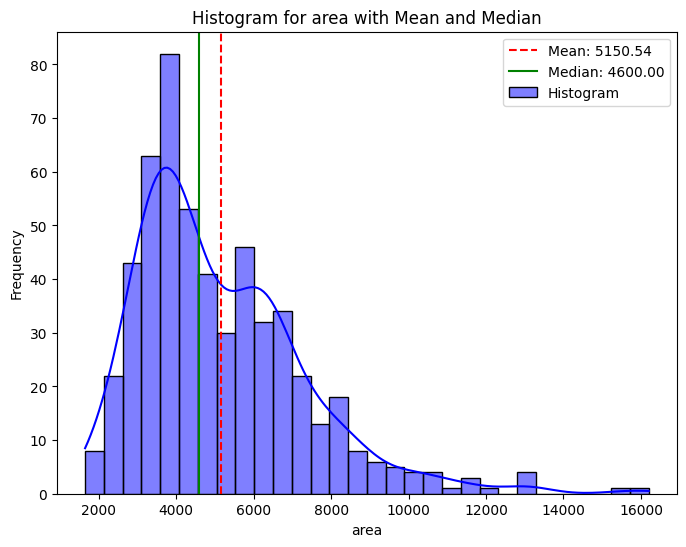

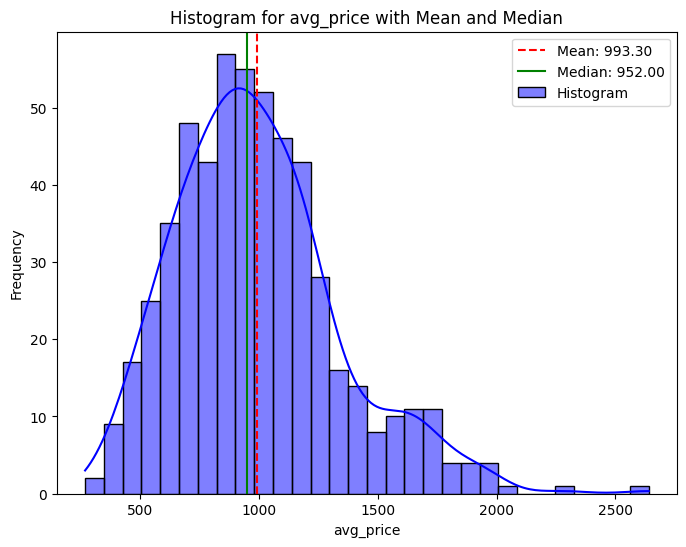

In [ ]:
# Tworzenie histogramów z zaznaczeniem średniej i mediany
for column in columns_to_plot:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True, bins=30, color='blue', label='Histogram')

    # Obliczanie średniej i mediany
    mean_value = df[column].mean()
    median_value = df[column].median()

    # Rysowanie linii dla średniej i mediany
    plt.axvline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
    plt.axvline(median_value, color='green', linestyle='-', label=f'Median: {median_value:.2f}')

    # Dodanie tytułu, legendy i osi
    plt.title(f'Histogram for {column} with Mean and Median')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()


Rozkłady danych finansowych są prawoskośne: średnia wyższa od mediany, widoczny na histogramach dłuższy prawy ogon.
Sprawdzam outliery  

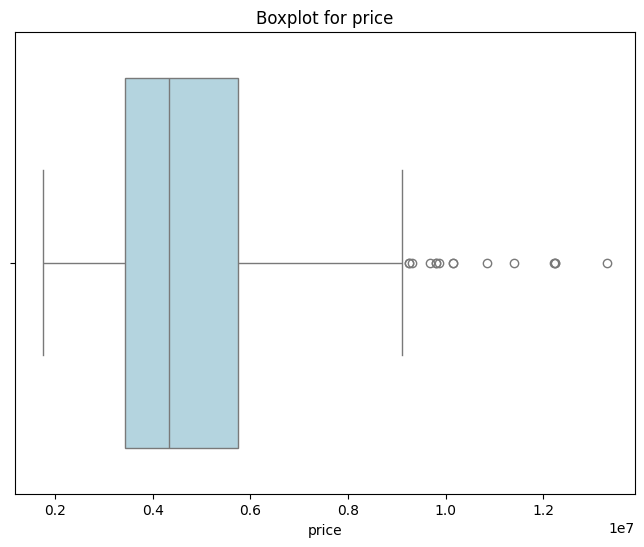

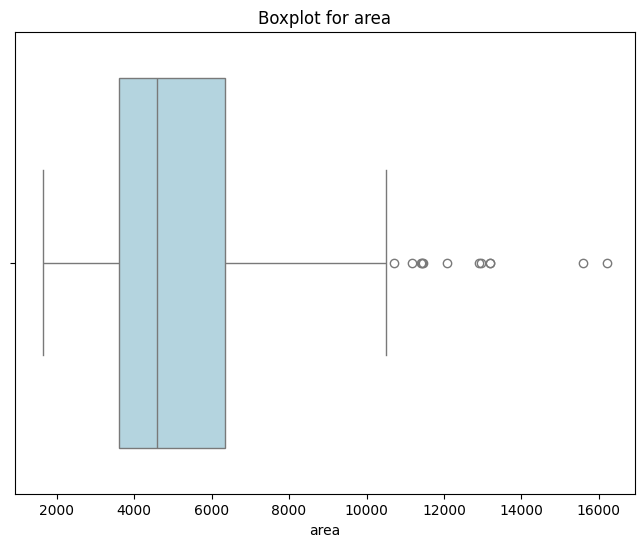

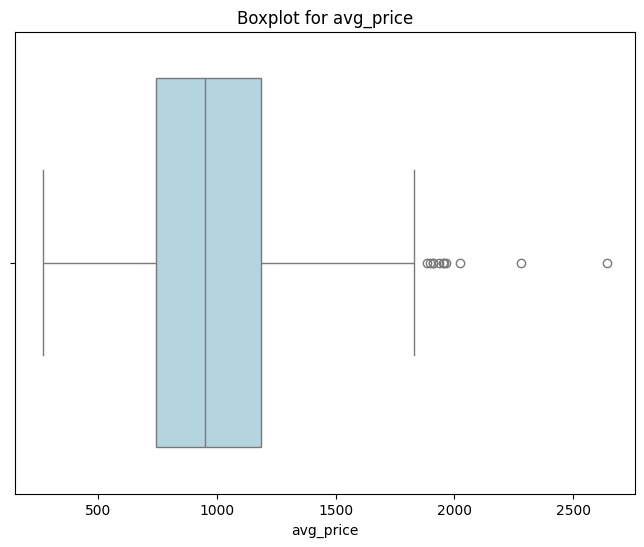

In [ ]:
# Tworzenie wykresów pudełkowych dla kolumn 'price', 'area' i 'avg_price'
for column in columns_to_plot:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column], color='lightblue')

    # Dodanie tytułu i etykiet
    plt.title(f'Boxplot for {column}')
    plt.xlabel(column)
    plt.show()


In [ ]:
# Ciekawe są te outliery zwłaszcza w avg_price bo to relacja ceny do wielkości. FLaguję wszystkie outliery bo chcę wiedzieć czy wyjątek w średniej cenie jest pochodną wyjątku w cenie i/lub wielkości.
# Funkcja do obliczania dolnych i górnych granic dla wartości odstających
def calculate_outlier_bounds(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Dodanie flag dla wartości odstających w kolumnach 'price', 'area', i 'avg_price'
for column in ['price', 'area', 'avg_price']:
    lower_bound, upper_bound = calculate_outlier_bounds(df[column])
    df[f'{column}_outlier'] = (df[column] < lower_bound) | (df[column] > upper_bound)

# Dodanie ogólnej flagi dla wartości odstających w dowolnej z kolumn
outlier_columns = [f'{column}_outlier' for column in ['price', 'area', 'avg_price']]
df['is_outlier'] = df[outlier_columns].any(axis=1)

# Wyświetlenie wierszy z co najmniej jedną wartością odstającą
outliers_flagged = df[df['is_outlier']]
outliers_flagged.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,avg_price,price_outlier,area_outlier,avg_price_outlier,is_outlier
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2,1792,True,False,False,True
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2,1367,True,False,False,True
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,1230,True,False,False,True
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2,1629,True,False,False,True
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2,1538,True,False,False,True


In [ ]:
# Filtrowanie wierszy, w których avg_price_outlier ma wartość True
avg_price_outliers = df[df['avg_price_outlier']]
avg_price_outliers

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,avg_price,price_outlier,area_outlier,avg_price_outlier,is_outlier
13,9240000,3500,4,2,2,1,0,0,1,0,2,0,2,2640,True,False,True,True
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,2,1933,False,False,True,True
20,8750000,4320,3,1,2,1,0,1,1,0,2,0,1,2025,False,False,True,True
23,8645000,4560,3,2,2,1,1,1,0,1,1,0,2,1896,False,False,True,True
108,6107500,3240,4,1,3,1,0,0,0,0,1,0,1,1885,False,False,True,True
157,5495000,2817,4,2,2,0,1,1,0,0,1,0,2,1951,False,False,True,True
271,4340000,1905,5,1,2,0,0,1,0,0,0,0,1,2278,False,False,True,True
282,4270000,2175,3,1,2,0,1,1,0,1,0,0,0,1963,False,False,True,True
302,4200000,2145,3,1,3,1,0,0,0,0,1,1,0,1958,False,False,True,True
345,3850000,2015,3,1,2,1,0,1,0,0,0,1,1,1911,False,False,True,True


Tyko jeden przypadek wyjątkowej średniej ceny jest związany z wyjątkową ceną nieruchomości. Tzn że na średnią cenę wpływ mają inne cechy.  

# Analiza wpływu cech nieruchomości na cenę

To co mnie ciekawi to jakie cechy czy wartości tych cech mają wpływ na cenę średnią przede wszystkim. Rozpoczynam analizę od zbadania korelacji wszystkich cech ze sobą.

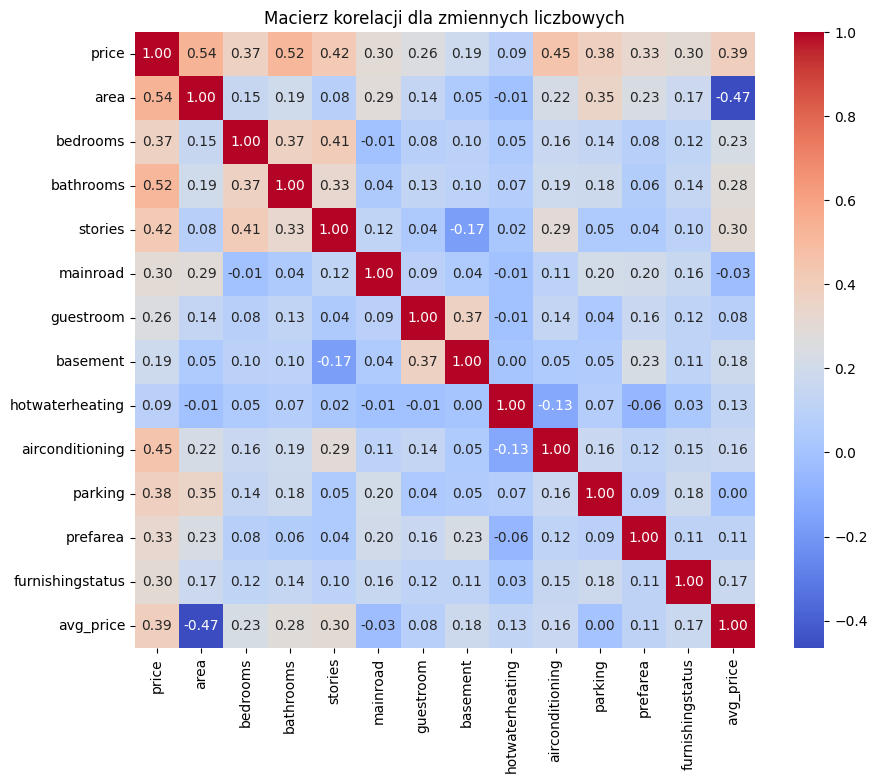

In [ ]:
# Wybór kolumn liczbowych do analizy
num_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus', 'avg_price']

# Obliczenie macierzy korelacji
corr_matrix = df[num_cols].corr()

# Wizualizacja macierzy korelacji
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Macierz korelacji dla zmiennych liczbowych")
plt.show()


Większość korelacji jest słaba (z zakresu od -0.2 do 0.2). Ale jest kilka ciekawostek.

In [ ]:
# Korelacje z ceną

# Dodanie kolumny 'group' przypisującej nazwę grupy do kolumn

def assign_group(column):
    if column in facilities:
        return 'facilities'
    elif column in struktura:
        return 'struktura'
    else:
        return 'other'

# Tworzenie DataFrame z informacją o grupach dla kolumn
column_groups = {column: assign_group(column) for column in df.columns}

df_groups = pd.DataFrame(list(column_groups.items()), columns=['Column', 'Group'])

# Wybranie korelacji dla 'price' spoza zakresu -0.2 do 0.2
price_corr = corr_matrix['price']
filtered_corr = price_corr[(price_corr < -0.2) | (price_corr > 0.2)]

# Posortowanie wyników malejąco
sorted_corr = filtered_corr.sort_values(ascending=False)

# Dodanie grup do tabeli korelacji
sorted_corr_table = sorted_corr.to_frame(name='Correlation with Price')
sorted_corr_table['Group'] = sorted_corr_table.index.map(column_groups)

# Wyświetlenie tabeli
sorted_corr_table


,Correlation with Price,Group
price,1.000000,other
area,0.535997,other
bathrooms,0.517545,struktura
airconditioning,0.452954,facilities
stories,0.420712,struktura
avg_price,0.392944,other
parking,0.384394,facilities
bedrooms,0.366494,struktura
prefarea,0.329777,facilities
furnishingstatus,0.304721,facilities


Oczywiście względnie silna korelacja ceny z powierzchnią nie jest zaskoczeniem. Ciekawostką dla mnie jest to że liczba łazienek jest lepszym predyktorem wyższej ceny niż liczba pięter czy sypialni. Można by powiedzieć że większa liczba łazienek to pewnie większy dom który może mieć mało pięter ale patrząc na macierz korelacji liczba łazienek czy sypialni jest słabiutko powiązana z powierzchnią. Czyli muszą być inne czynniki i tu pewnie rola facilities które są w przypadku klimatyzacji czy parkingu mocniej skorelowane z ceną niż liczba sypialni. Czyli mniejszy dom z lepszymi udogodnieniami może mieć wyższą cenę niż wielki ale słabo wyposażony.

In [ ]:
#Korelacje ze średnią ceną

# Tworzenie DataFrame z informacją o grupach dla kolumn
column_groups = {column: assign_group(column) for column in df.columns}

df_groups = pd.DataFrame(list(column_groups.items()), columns=['Column', 'Group'])

# Wybranie korelacji dla 'price' spoza zakresu -0.2 do 0.2
price_corr = corr_matrix['avg_price']
filtered_corr = price_corr[(price_corr < -0.2) | (price_corr > 0.2)]

# Posortowanie wyników malejąco
sorted_corr = filtered_corr.sort_values(ascending=False)

# Dodanie grup do tabeli korelacji
sorted_corr_table = sorted_corr.to_frame(name='Correlation with Price')
sorted_corr_table['Group'] = sorted_corr_table.index.map(column_groups)

# Wyświetlenie tabeli
sorted_corr_table


,Correlation with Price,Group
avg_price,1.000000,other
price,0.392944,other
stories,0.303856,struktura
bathrooms,0.283881,struktura
bedrooms,0.229605,struktura
area,-0.465500,other


Tu dwie rzeczy od razu rzucają się w oczy:
- słabe korelacje ceny średniej z facilities, na średnią cenę wpływają tylko cechy strukturalne
- średniosilna NEGATYWNA korelacja średniej ceny z area czyli jak rośnie powierzchnia to spada średnia cena

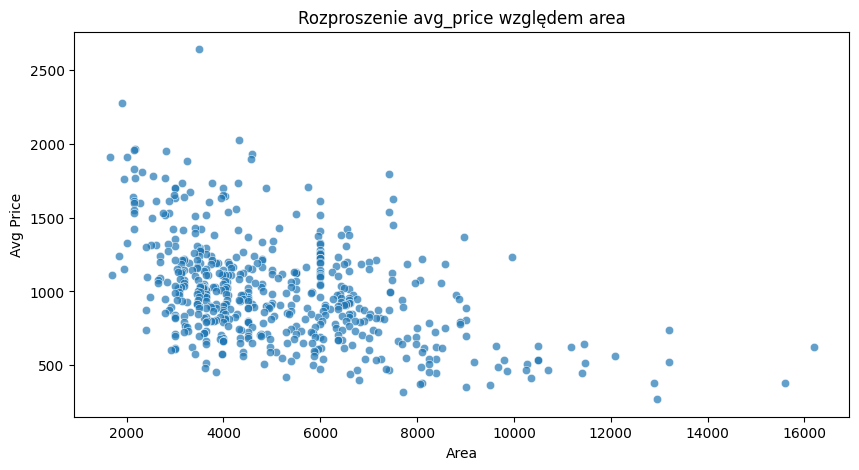

In [ ]:
# Wykres rozproszenia dla area vs avg_price
plt.figure(figsize=(10, 5))
sns.scatterplot(x='area', y='avg_price', data=df, alpha=0.7)
plt.title("Rozproszenie avg_price względem area")
plt.xlabel("Area")
plt.ylabel("Avg Price")
plt.show()

Widać to dobrze na tym wykresie gdzie wraz ze wzrostem powierzchni spada średnia cena. Wydaje mi się że można to rozumieć tak że klienci są gotowi zapłacić więcej za kompaktowe nieruchomości, nie duże ale napakowane strukturalnie tj piętrami, łazienkami i sypialniami.